# Obtain and Inspect the Data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from scipy import stats

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer


%matplotlib inline

SEED = 54

sns.set_style('darkgrid')
sns.set_palette('deep')


In [2]:
date_cols = ['Date of Survey', 'Check-Out Day','Check-In Date']
rental = pd.read_csv(
    '02. Responses (Atlantic) (1).csv', 
    parse_dates = date_cols
)
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495 entries, 0 to 1494
Data columns (total 72 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Main Hierarchy                       1494 non-null   object        
 1   Main Hierarchy.1                     1493 non-null   object        
 2   Location                             1489 non-null   object        
 3   RA Number                            1489 non-null   object        
 4   Brand                                1489 non-null   object        
 5   Date of Survey                       1489 non-null   datetime64[ns]
 6   Check-Out Day                        1489 non-null   datetime64[ns]
 7   Check-Out Time                       1343 non-null   object        
 8   Original Customer Tier Code          1489 non-null   object        
 9   #1 Club Number                       1489 non-null   float64       
 10  AAA Account 

In [3]:
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495 entries, 0 to 1494
Data columns (total 72 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Main Hierarchy                       1494 non-null   object        
 1   Main Hierarchy.1                     1493 non-null   object        
 2   Location                             1489 non-null   object        
 3   RA Number                            1489 non-null   object        
 4   Brand                                1489 non-null   object        
 5   Date of Survey                       1489 non-null   datetime64[ns]
 6   Check-Out Day                        1489 non-null   datetime64[ns]
 7   Check-Out Time                       1343 non-null   object        
 8   Original Customer Tier Code          1489 non-null   object        
 9   #1 Club Number                       1489 non-null   float64       
 10  AAA Account 

# Data Exploration and Cleaning

There are a significant number of columns that have significant - or even all - null values. I will create a new dataframe with only the columns that have 50% or higher non-null values and any column that contains textual comment data.

In [4]:
cols_to_keep = []

for col in rental.columns:
    if (
        rental[col].notna().sum() >= (rental.shape[0] * .5) 
        or 'comment' in col.lower()
    ):
        cols_to_keep.append(col)
   
clean_rental = rental[cols_to_keep]

It is common for the columns to have 6 null values. Upon investigation, there are 6 rows that are missing the majority of the data. I will remove these rows.

In [5]:
clean_rental = clean_rental[clean_rental['Brand'].notna()]

In [6]:
clean_rental.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1489 entries, 3 to 1494
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Main Hierarchy                     1489 non-null   object        
 1   Main Hierarchy.1                   1489 non-null   object        
 2   Location                           1489 non-null   object        
 3   RA Number                          1489 non-null   object        
 4   Brand                              1489 non-null   object        
 5   Date of Survey                     1489 non-null   datetime64[ns]
 6   Check-Out Day                      1489 non-null   datetime64[ns]
 7   Check-Out Time                     1343 non-null   object        
 8   Original Customer Tier Code        1489 non-null   object        
 9   #1 Club Number                     1489 non-null   float64       
 10  Contract                           1

Next, I will go through each column and make decisions about data types, nulls and do any string formatting required.

## Location

In [7]:
clean_rental.iloc[:,0:3]

,Main Hierarchy,Main Hierarchy.1,Location
3,02160 - HTZ - PHX - PHOENIX AZ AP,0216003 - HTZ - PHX - CUTTER AVIATION AZ,0216003 - HTZ - PHX - CUTTER AVIATION AZ
5,02160 - HTZ - PHX - PHOENIX AZ AP,0216011 - HTZ - PHX - PHOENIX AZ AP,0216011 - HTZ - PHX - PHOENIX AZ AP
6,02160 - HTZ - PHX - PHOENIX AZ AP,0216011 - HTZ - PHX - PHOENIX AZ AP,0216011 - HTZ - PHX - PHOENIX AZ AP
7,02160 - HTZ - PHX - PHOENIX AZ AP,0216011 - HTZ - PHX - PHOENIX AZ AP,0216011 - HTZ - PHX - PHOENIX AZ AP
8,02160 - HTZ - PHX - PHOENIX AZ AP,0216011 - HTZ - PHX - PHOENIX AZ AP,0216011 - HTZ - PHX - PHOENIX AZ AP
...,...,...,...
1488,02160 - HTZ - PHX - PHOENIX AZ AP,0216011 - HTZ - PHX - PHOENIX AZ AP,0216011 - HTZ - PHX - PHOENIX AZ AP
1489,02160 - HTZ - PHX - PHOENIX AZ AP,0216011 - HTZ - PHX - PHOENIX AZ AP,0216011 - HTZ - PHX - PHOENIX AZ AP
1490,02160 - HTZ - PHX - PHOENIX AZ AP,0216011 - HTZ - PHX - PHOENIX AZ AP,0216011 - HTZ - PHX - PHOENIX AZ AP
1492,02160 - HTZ - PHX - PHOENIX AZ AP,0216029 - HTZ - PHX - HILTON PHOENIX AIRPORT AZ,0216029 - HTZ - PHX - HILTON PHOENIX AIRPORT AZ


In [8]:
clean_rental['Location'].value_counts()

0216011 - HTZ - PHX - PHOENIX AZ AP                1486
0216003 - HTZ - PHX - CUTTER AVIATION AZ              1
0216029 - HTZ - PHX - HILTON PHOENIX AIRPORT AZ       1
0216032 - HTZ - PHX - SWIFT AVIATION AZ               1
Name: Location, dtype: int64

In [9]:
clean_rental['Main Hierarchy'].value_counts()

02160 - HTZ - PHX - PHOENIX AZ AP    1489
Name: Main Hierarchy, dtype: int64

It appears that all of the cars are assigned to the Phoenix airport and 3 (0.2%) of them were picked up from an alternate location. Because there is so little information contained in these columns, I will remove them.

In [10]:
clean_rental.drop(['Main Hierarchy', 'Main Hierarchy.1', 'Location'], axis=1, inplace=True)

## RA Number

In [11]:
clean_rental['RA Number'].nunique()

1489

This column is a unique identifier. 

## Brand

In [12]:
clean_rental['Brand'].value_counts()

Hertz    1489
Name: Brand, dtype: int64

All of the cars are from Hertz. This column can be removed because it contains no additional information.

In [13]:
clean_rental.drop('Brand', axis=1, inplace=True)

## Date of Survey

In [14]:
clean_rental['Date of Survey'].describe()

<ipython-input-14-ed8df935ca74>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  clean_rental['Date of Survey'].describe()


count                    1489
unique                     23
top       2019-07-08 00:00:00
freq                      100
first     2019-07-01 00:00:00
last      2019-07-23 00:00:00
Name: Date of Survey, dtype: object

In [15]:
clean_rental['Date of Survey'].value_counts().sort_index()

2019-07-01     77
2019-07-02     88
2019-07-03     49
2019-07-04     62
2019-07-05     37
2019-07-06     48
2019-07-07     64
2019-07-08    100
2019-07-09     56
2019-07-10     57
2019-07-11     70
2019-07-12     63
2019-07-13     60
2019-07-14     54
2019-07-15     92
2019-07-16     73
2019-07-17     61
2019-07-18     58
2019-07-19     46
2019-07-20     55
2019-07-21     74
2019-07-22     97
2019-07-23     48
Name: Date of Survey, dtype: int64

This data is from surveys that were administered from 7/1/2019 to 7/23/2019. 

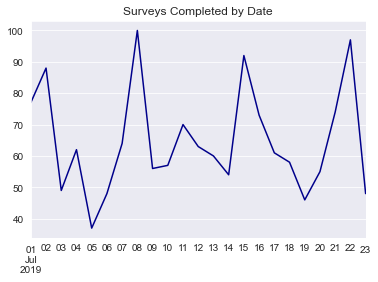

In [16]:
clean_rental['Date of Survey'].value_counts().sort_index().plot(color='darkblue')
plt.title('Surveys Completed by Date');

The seasonality is immediately apparent. To explore if this is related to the day of the week, I will add a day of week column.

In [17]:
clean_rental['Survey Day of Week'] = (
    clean_rental['Date of Survey'].dt.dayofweek
)

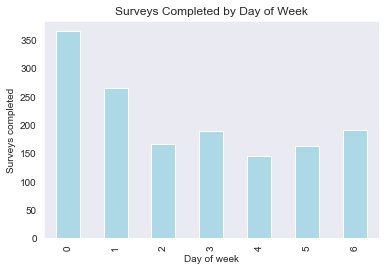

In [18]:
clean_rental['Survey Day of Week'].value_counts().sort_index().plot(
    kind='bar',
    color='lightblue'
)
plt.title('Surveys Completed by Day of Week')
plt.xlabel('Day of week')
plt.ylabel('Surveys completed')
plt.grid(False);

People are more likely to complete surveys on Monday or Tuesday. This may be related to when they turn in the car. I will investigate that later.

## Check-Out Day and Time

In [19]:
clean_rental['Check-Out Day'].describe()

<ipython-input-19-fa6d74450f59>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  clean_rental['Check-Out Day'].describe()


count                    1489
unique                     48
top       2019-07-08 00:00:00
freq                       89
first     2019-05-11 00:00:00
last      2019-07-22 00:00:00
Name: Check-Out Day, dtype: object

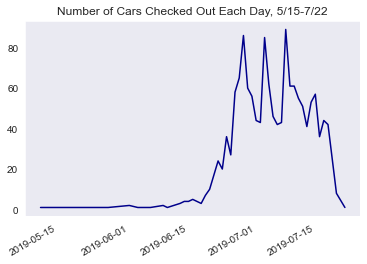

In [20]:
clean_rental['Check-Out Day'].value_counts().sort_index().plot(color='darkblue')
plt.title('Number of Cars Checked Out Each Day, 5/15-7/22')
plt.grid(False);

While a few cars were checked out before mid-June, most were checked out in July, suggesting shorter-term rentals. Again, there is indication of seasonality. I will add a column with the day of the week the car is checked out. 

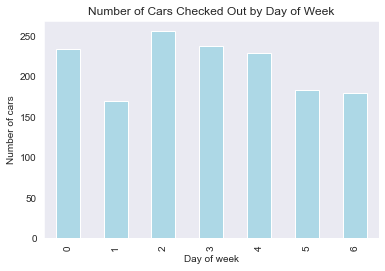

In [21]:
clean_rental['Day of Week Checked Out'] = (
    clean_rental['Check-Out Day'].dt.dayofweek
)
clean_rental['Day of Week Checked Out'].value_counts().sort_index().plot(
    kind='bar',
    color='lightblue'
)
plt.title('Number of Cars Checked Out by Day of Week')
plt.xlabel('Day of week')
plt.ylabel('Number of cars')
plt.grid(False);

There is less variability here than with the survey completion date. Interestingly, Wednesday is the most popular date to check out a car. 

In [22]:
clean_rental['Check-Out Time'].describe()

count         1343
unique         725
top       10:37 AM
freq             9
Name: Check-Out Time, dtype: object

In [23]:
clean_rental['Check-Out Time'].isna().sum()

146

In [24]:
clean_rental['Check-Out Time'][:20]

3     10:30 AM
5      8:21 PM
6      3:32 PM
7      1:07 PM
8      9:40 AM
9      1:46 PM
10     4:39 PM
11     6:49 AM
12    10:28 AM
13     5:21 PM
14    10:24 AM
15     5:55 PM
16    10:56 AM
17     6:14 PM
18     2:05 PM
19     4:38 PM
20     9:56 PM
21     1:46 PM
22    10:58 AM
23    12:01 AM
Name: Check-Out Time, dtype: object

In [25]:
clean_rental['Check-Out Time'].str.contains('AM').sum()

523

In [26]:
clean_rental['Check-Out Time'].str.contains('PM').sum()

820

There is significant variability with check-out time, as expected.  There are 146 null values (approximately 10%). The entries in the dataframe seem to be recorded by when the survey was returned, not by the check-out date and time, so the surrounding values give no clue to the missing data. With the given scenario, there is no need for this level of granularity and since any method to impute these values would reduce any information, I am going to delete the column.

In [27]:
clean_rental.drop('Check-Out Time', axis=1, inplace=True)

## Check-In Date and Time

In [28]:
clean_rental['Check-In Date'].isna().sum()

140

Some customers seem to have completed a survey before turning in their rental car. I will examine those to ensure that they are indeed completed surveys.

In [29]:
clean_rental[clean_rental['Check-In Date'].isna()]

,RA Number,Date of Survey,Check-Out Day,Original Customer Tier Code,#1 Club Number,Contract,NPS Score,Recommend,Recommend Comment,Overall Satisfaction with Vehicle,...,Pickup CSR Number,Vehicle Model Code,Vehicle Model Description,Check-In Date,Check-In Time,Member?,Checkout Mileage,Receipt Survey Type,Survey Day of Week,Day of Week Checked Out
1347,834824325,2019-07-22,2019-07-07,Regular Gold,63434384.0,160528.0,100.0,9.0,NaN,9.0,...,NaN,NaN,NaN,NaT,NaN,Yes,NaN,Email Invite,0,6
1348,913045836,2019-07-22,2019-07-17,Regular Gold,99297170.0,285724.0,0.0,8.0,Great service,8.0,...,NaN,NaN,NaN,NaT,NaN,Yes,NaN,Email Invite,0,2
1349,913915015,2019-07-22,2019-07-18,Regular Gold,36791402.0,4438.0,0.0,8.0,Great service but only one car to choose from,7.0,...,NaN,NaN,NaN,NaT,NaN,Yes,NaN,Email Invite,0,3
1350,912256030,2019-07-22,2019-07-16,Presidents Circle,66083609.0,66556.0,100.0,10.0,You're the best in the business...,10.0,...,NaN,NaN,NaN,NaT,NaN,Yes,NaN,Email Invite,0,1
1351,915122773,2019-07-22,2019-07-19,Regular Gold,30661726.0,282707.0,100.0,10.0,NaN,10.0,...,NaN,NaN,NaN,NaT,NaN,Yes,NaN,Email Invite,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,913488660,2019-07-23,2019-07-18,Non-Member,0.0,NaN,100.0,9.0,Brand new car. Prompt service.,10.0,...,NaN,NaN,NaN,NaT,NaN,No,NaN,Email Invite,1,3
1488,834507531,2019-07-23,2019-07-07,Presidents Circle,51437418.0,305875.0,-100.0,0.0,Please contact me so I can explain to a “live”...,5.0,...,NaN,NaN,NaN,NaT,NaN,Yes,NaN,Email Invite,1,6
1489,913646554,2019-07-23,2019-07-18,Regular Gold,97783751.0,160528.0,100.0,10.0,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,Yes,NaN,Email Invite,1,3
1490,914882544,2019-07-23,2019-07-19,Regular Gold,99572545.0,26317.0,100.0,10.0,NaN,10.0,...,NaN,NaN,NaN,NaT,NaN,Yes,NaN,Email Invite,1,4


In [30]:
clean_rental['Check-In Date'].describe()

<ipython-input-30-ea96da281b05>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  clean_rental['Check-In Date'].describe()


count                    1349
unique                     35
top       2019-07-07 00:00:00
freq                      103
first     2019-06-06 00:00:00
last      2019-07-22 00:00:00
Name: Check-In Date, dtype: object

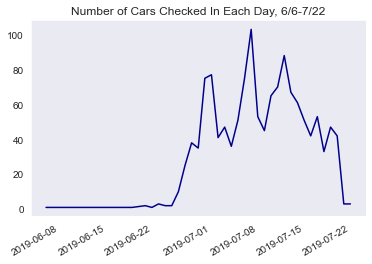

In [31]:
clean_rental['Check-In Date'].value_counts().sort_index().plot(color='darkblue')
plt.title('Number of Cars Checked In Each Day, 6/6-7/22')
plt.grid(False);

This has a similar distribution to the checked out column. I will add a column to describe the length of the rental period.

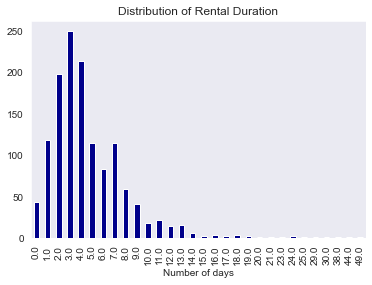

In [32]:
clean_rental['Rental Duration (days)'] = (
    clean_rental['Check-In Date'] - clean_rental['Check-Out Day']
).dt.days
clean_rental['Rental Duration (days)'].value_counts().sort_index().plot(
    kind='bar',
    color='darkblue'
)
plt.title('Distribution of Rental Duration')
plt.xlabel('Number of days')
plt.grid(False);

The distribution of rentals is right-skewed, where the majority of customers rent for 7 or fewer days with a few renting for longer periods. Of note, there are some rentals that were for less than 24 hours.

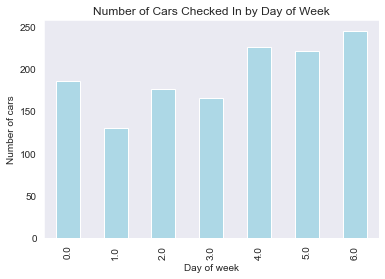

In [33]:
clean_rental['Day of Week Checked In'] = (
    clean_rental['Check-In Date'].dt.dayofweek
)
clean_rental['Day of Week Checked In'].value_counts().sort_index().plot(
    kind='bar',
    color='lightblue'
)
plt.title('Number of Cars Checked In by Day of Week')
plt.xlabel('Day of week')
plt.ylabel('Number of cars')
plt.grid(False);

Sunday is the most popular day to turn in cars, which explains why the surveys completed are highest on Monday and Tuesday.

In [34]:
clean_rental['Check-In Time'].isna().sum()

146

In [35]:
clean_rental['Check-In Time'].str.contains('PM').sum()

647

In [36]:
clean_rental['Check-In Time'].str.contains('AM').sum()

696

In [37]:
clean_rental[(clean_rental['Check-In Time'].isna() & (clean_rental['Check-In Date'].notna()))]

,RA Number,Date of Survey,Check-Out Day,Original Customer Tier Code,#1 Club Number,Contract,NPS Score,Recommend,Recommend Comment,Overall Satisfaction with Vehicle,...,Vehicle Model Description,Check-In Date,Check-In Time,Member?,Checkout Mileage,Receipt Survey Type,Survey Day of Week,Day of Week Checked Out,Rental Duration (days),Day of Week Checked In
280,832058334,2019-07-04,2019-07-03,5 Star Gold,63668516.0,26317.0,100.0,10.0,NaN,10.0,...,NaN,2019-07-04,NaN,Yes,NaN,E-Receipt,3,2,1.0,3.0
1383,837603034,2019-07-22,2019-07-11,5 Star Gold,36195861.0,38020.0,-100.0,5.0,I asked the Tucson Hertz counter employee to s...,7.0,...,NaN,2019-07-11,NaN,Yes,NaN,E-Receipt,0,3,0.0,3.0
1401,914133905,2019-07-22,2019-07-18,Regular Gold,98757294.0,88881.0,100.0,10.0,NaN,8.0,...,NaN,2019-07-22,NaN,Yes,NaN,E-Receipt,0,3,4.0,0.0
1422,913052022,2019-07-22,2019-07-17,Regular Gold,60552160.0,26317.0,100.0,9.0,"Everything went well, but I did not like the M...",6.0,...,NaN,2019-07-22,NaN,Yes,NaN,E-Receipt,0,2,5.0,0.0
1428,819931335,2019-07-22,2019-06-29,Regular Gold,99273272.0,305875.0,100.0,10.0,Everything was so nice and easy . I got a luxu...,10.0,...,NaN,2019-07-17,NaN,Yes,NaN,E-Receipt,0,5,18.0,2.0
1442,914969285,2019-07-22,2019-07-19,5 Star Gold,40292476.0,469335.0,-100.0,0.0,I have been a five star member or gold member ...,3.0,...,NaN,2019-07-22,NaN,Yes,NaN,E-Receipt,0,4,3.0,0.0


For the same reasons as before, I will remove this column.

In [38]:
clean_rental.drop('Check-In Time', axis=1, inplace=True)

## Customer Tier Code

In [39]:
clean_rental['Original Customer Tier Code'].value_counts()

Regular Gold         796
5 Star Gold          257
Non-Member           214
Presidents Circle    170
#1 Club Member        32
Platinum              20
Name: Original Customer Tier Code, dtype: int64

The majority of the customers have some sort of membership with Hertz. Information about membership levels: https://upgradedpoints.com/travel/car-rentals/hertz-gold-plus-rewards/

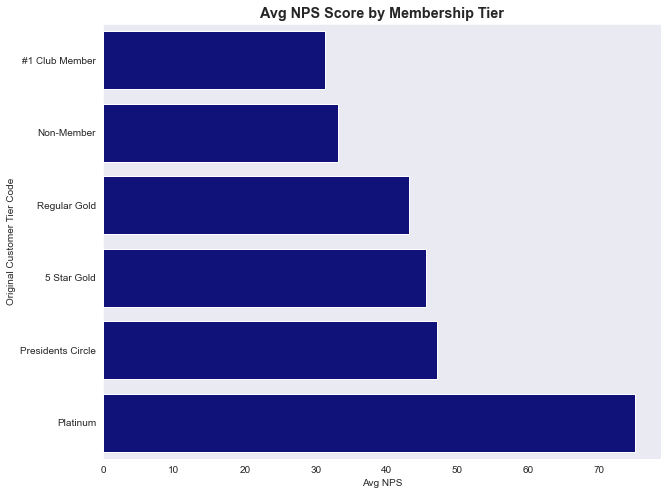

In [177]:
nps_by_tier = clean_rental.groupby('Original Customer Tier Code').agg(
        {
            'NPS Score': 'mean', 
            'Survey ID':'count'
        }
    ).sort_values('NPS Score')

fig, ax = plt.subplots(figsize = (10,8))
sns.barplot(
    x=nps_by_tier['NPS Score'].values,
    y=nps_by_tier.index,
    color='darkblue'
)
plt.grid(False)
plt.title('Avg NPS Score by Membership Tier', fontsize='x-large', fontweight='bold')
plt.xlabel('Avg NPS');

## Club Number

In [40]:
clean_rental['#1 Club Number'].value_counts()

0.0           212
59233075.0      2
58305282.0      2
98757294.0      2
69987208.0      2
             ... 
59333609.0      1
54743436.0      1
63056940.0      1
99525676.0      1
68810353.0      1
Name: #1 Club Number, Length: 1274, dtype: int64

In [41]:
clean_rental['#1 Club Number'].isna().sum()

0

In [42]:
freq = clean_rental['#1 Club Number'].value_counts() == 2
freq = freq[freq==True]
freq.index

Float64Index([59233075.0, 58305282.0, 98757294.0, 69987208.0], dtype='float64')

It appears that this is a general membership number and that 0.0 is used for non-members (with 2 non-members having a membership code entered). There are four members who rented twice during the reported period. If this data were from a longer time period, customer frequency would certainly be an important factor. However, with this brief period and only four customers renting twice, I am not going to consider that factor here. Since club number provides no additional information apart from number of rentals, I will drop the column.

In [43]:
clean_rental.drop('#1 Club Number', axis=1, inplace=True)

## Contract

In [44]:
clean_rental['Contract'].describe()

count      1479.000000
mean     163404.052062
std      149755.873502
min           0.000000
25%       26317.000000
50%      160528.000000
75%      297357.000000
max      824824.000000
Name: Contract, dtype: float64

In [45]:
clean_rental['Contract'].nunique()

293

With a minimum of 0 a maximum of over 800,000 and 293 unique values, I am unsure what this column is referencing. Therefore, I will remove it.

In [46]:
clean_rental.drop('Contract', axis=1, inplace=True)

## Net Promoter Score

In [47]:
clean_rental['NPS Score'].value_counts()

 100.0    932
-100.0    295
 0.0      262
Name: NPS Score, dtype: int64

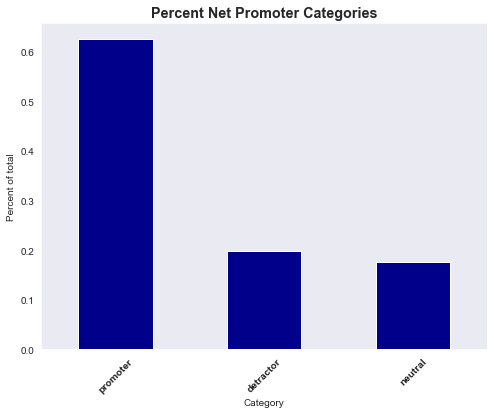

In [155]:
fig, ax = plt.subplots(figsize=(8,6))
clean_rental['NPS Score'].value_counts(normalize=True).plot(
    kind='bar', 
    color='darkblue'
)
ax.set_xticklabels(
    ['promoter', 'detractor', 'neutral'], 
    rotation=45, 
    fontweight='bold'
)
plt.grid(False)
plt.title('Percent Net Promoter Categories', fontsize='x-large', fontweight='bold')
plt.xlabel('Category')
plt.ylabel('Percent of total');

In [48]:
clean_rental['NPS Score'].isna().sum()

0

In [49]:
clean_rental[clean_rental['NPS Score'] == 0]['Recommend'].unique()

array([7., 8.])

This appears to be the value assigned to the NPS. 
- 100 if recommend score 9 or 10
- 0 if recommend score 7 or 8
- -100 if recommend score <= 6

In [50]:
num_prom = clean_rental[clean_rental['NPS Score'] == 100].shape[0]
num_detrac = clean_rental[clean_rental['NPS Score'] == -100].shape[0]
total = clean_rental['NPS Score'].shape[0]

overall_nps = num_prom/total - num_detrac/total
print(f'The overall Net Promoter Score is {round(overall_nps,4)*100}%.')

The overall Net Promoter Score is 42.78%.


Ideally, data would be available over a longer period of time, so that the overall NPS could be monitored for changes over time. I will quickly check to see if there seems to be any variation based on date with the available data.

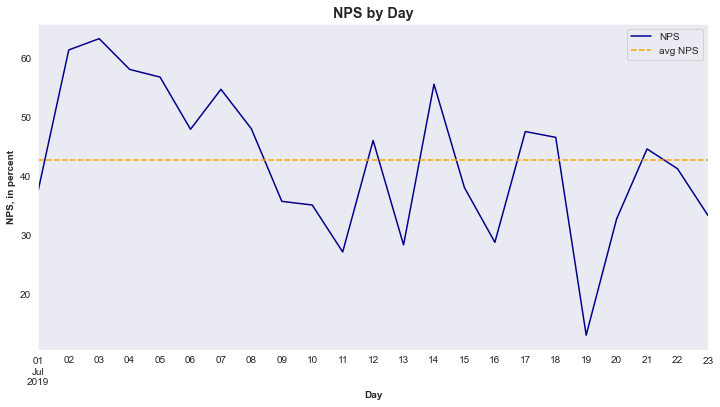

In [204]:
nps_by_day = pd.DataFrame(columns = ['NPS'])

for date in clean_rental['Date of Survey'].values:
    
    num_prom = (
        clean_rental[
            (clean_rental['Date of Survey'] == date) & 
                (clean_rental['NPS Score'] == 100)]).shape[0]
    
    num_detrac = (
        clean_rental[
            (clean_rental['Date of Survey'] == date) & 
                (clean_rental['NPS Score'] == -100)]).shape[0]
    
    
    total = clean_rental[clean_rental['Date of Survey'] == date].shape[0]
    
    nps_by_day.loc[date, 'NPS'] = round(num_prom/total - num_detrac/total,4)*100

    
nps_by_day['NPS'] = nps_by_day['NPS'].astype('float')

nps_by_day.sort_index().plot(color='darkblue', figsize = (12,6))
plt.axhline(overall_nps*100, color='orange', linestyle='--', label='avg NPS')
plt.title('NPS by Day', fontsize='x-large',fontweight='bold')
plt.xlabel('Day', fontweight='bold')
plt.ylabel('NPS, in percent', fontweight='bold')
plt.legend()
plt.grid(False);

In [52]:
nps_by_day.describe()

,NPS
count,23.000000
mean,42.670000
std,12.591285
min,13.040000
25%,34.210000
50%,44.590000
75%,51.345000
max,63.270000


In [53]:
clean_rental['Date of Survey'].value_counts().min()

37

There certainly is come variability in the NPS over the 23-day period. Next, I will use bootstrapping to simulate the NPS scores for 10,000 days to see if this amount of variability is to be expected. 

In [54]:
np.random.seed(SEED)

num_surveys = int(clean_rental['Date of Survey'].value_counts().mean())

sim_nps = []

for i in range(10_000):
    scores = np.random.choice(clean_rental['NPS Score'].values, num_surveys)
    p = (scores == 100).sum()
    d = (scores == -100).sum()
    t = num_surveys
    nps = round(p/t - d/t,4)*100
    sim_nps.append(nps)
    

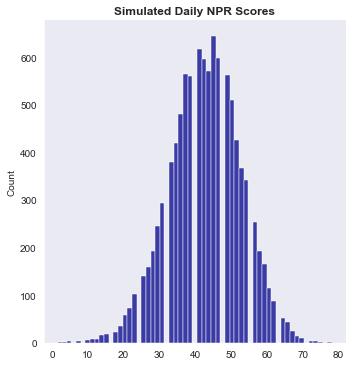

In [205]:
sns.displot(sim_nps, color='darkblue')
plt.title('Simulated Daily NPR Scores', fontweight='bold')
plt.grid(False);

In [56]:
ci_95 = stats.norm.interval(
    alpha = 0.95, 
    loc=np.mean(sim_nps), 
    scale=stats.sem(sim_nps)
)

print(f'We are 95% confident that the true NPS mean lies between {ci_95[0]:.2f} and {ci_95[1]:.2f}.')


We are 95% confident that the true NPS mean lies between 42.55 and 42.95.


The overall NPS from the 23 days of recorded survey data had a mean score of 42.78, which is within the 95% confidence interval.

In [57]:
st_dev = np.std(sim_nps)
print(f'68% of the daily NPS values lie between {np.mean(sim_nps) - st_dev:.2f} and {np.mean(sim_nps) + st_dev:.2f}.')
print(f'95% of the daily NPS values lie between {np.mean(sim_nps) - 2*st_dev:.2f} and {np.mean(sim_nps) + 2*st_dev:.2f}.')
print(f'99.7% of the daily NPS values lie between {np.mean(sim_nps) - 3*st_dev:.2f} and {np.mean(sim_nps) + 3*st_dev:.2f}.')

68% of the daily NPS values lie between 32.76 and 52.74.
95% of the daily NPS values lie between 22.78 and 62.72.
99.7% of the daily NPS values lie between 12.79 and 72.71.


This shows that while the recorded data held some relatively low (13) and high (63) values, they are still within 3 standard deviations of the mean and are not extreme scores.

Before moving on, I will check to see if the daily NPS seems to correlate with the number of surveys completed in a day.

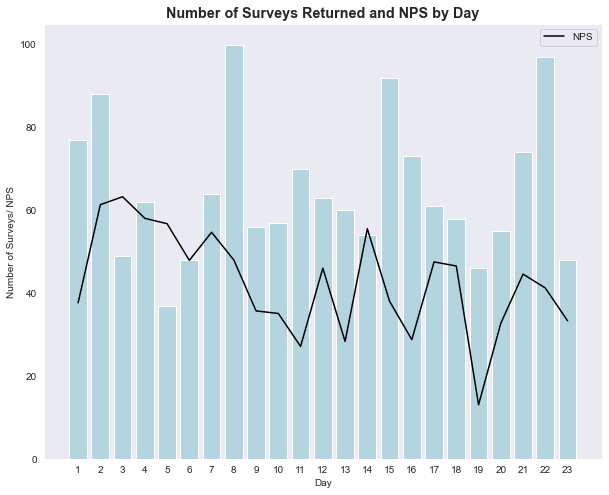

In [58]:
plt.subplots(figsize=(10,8))
sns.barplot(
    x=clean_rental['Date of Survey'].value_counts().sort_index().index.day,
    y=clean_rental['Date of Survey'].value_counts().sort_index().values,
    color='lightblue'
)
sns.lineplot(
    x=nps_by_day.sort_index().index.day - 1, 
    y=nps_by_day.sort_index()['NPS'].values,
    label = 'NPS',
    color='black')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Number of Surveys/ NPS')
plt.title(
    'Number of Surveys Returned and NPS by Day', 
    fontsize='x-large', 
    fontweight='bold'
)
plt.grid(False);

There does not appear to be a correlation. Overall, the variation in the NPS is within what we would expect and the overall mean score is within the 95% confidence interval. Twenty-three days is too short of a period to capture any trends or seasonality in the scores.

If NPS is going to be monitored as a KPI, it would need to be smoothed to account for the natural fluctuations in the data by looking at a 7-day (or longer) rolling average instead of the daily rate.

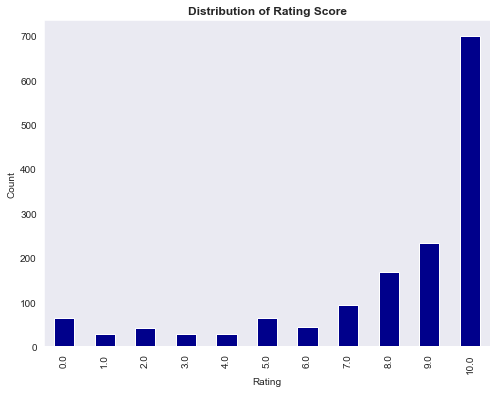

In [207]:
clean_rental['Recommend'].value_counts().sort_index().plot(
    kind='bar',
    color='darkblue',
    figsize=(8,6)
)
plt.title('Distribution of Rating Score', fontweight='bold')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(False);

The majority of the customers provide a rating score of 7 or higher, with 10 being the most common score. It may be worth looking to see what distinguishes the 7/8 customers from the 9/10 as well as investigating what factors contributed to a score of 0.

## Recommend Comment

In [60]:
clean_rental.groupby('NPS Score')['Recommend Comment'].count()

NPS Score
-100.0    282
 0.0      194
 100.0    600
Name: Recommend Comment, dtype: int64

Promoters left more comments than neutral or detractor customers. 

In [61]:
stop_words = set(stopwords.words('english'))
tokenizer = RegexpTokenizer(r'\w+')

def clean_text(text):
    """Removes punctuation and stopwords and returns a tokenized list of the
    words."""
    
    test_no_punc = tokenizer.tokenize(text)
    return [w.lower() for w in test_no_punc if w.lower() not in stop_words]


In [62]:
clean_rental['Recommend Comment Tokenized'] = (
    clean_rental
             [clean_rental['Recommend Comment'].notna()
             ]['Recommend Comment']
             .apply(clean_text)
             )

In [63]:
clean_rental[clean_rental['Recommend Comment Tokenized'].notna()]['Recommend Comment Tokenized']

6                                      [often, recommend]
9       [fees, taxes, accurately, calculated, time, bo...
12      [price, good, renting, easy, whole, thing, con...
13      [snelle, afhandeling, mogelijkheid, om, zelf, ...
15      [agent, fixed, problems, reservation, satisfac...
                              ...                        
1485    [accessible, site, customer, assistance, quest...
1486    [staff, great, equipment, great, jaguar, mess,...
1487                   [brand, new, car, prompt, service]
1488    [please, contact, explain, live, customer, ser...
1492    [difficult, book, online, phone, 5, different,...
Name: Recommend Comment Tokenized, Length: 1076, dtype: object

In [64]:
rec_comm_ind = (
    clean_rental[clean_rental['Recommend Comment Tokenized'].notna()]
    ['Recommend Comment Tokenized'].index
)

rec_comm_corpus = []

for i in rec_comm_ind:
    rec_comm_corpus.extend(clean_rental.loc[i,'Recommend Comment Tokenized'])

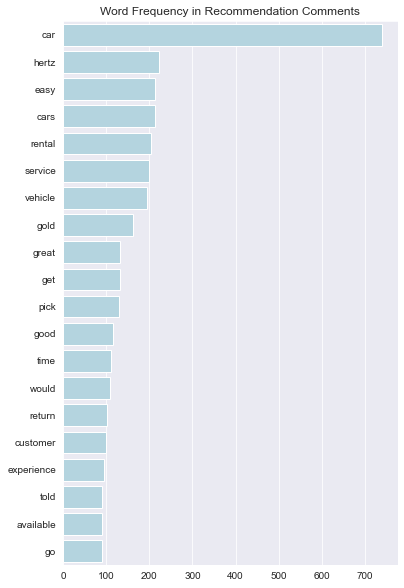

In [65]:
rec_comm_freq_dict = nltk.FreqDist(rec_comm_corpus)
rec_comm_freq_df = pd.DataFrame.from_dict(rec_comm_freq_dict, orient='index')
rec_comm_freq_df = rec_comm_freq_df.sort_values(
    0, 
    ascending=False
).rename(columns = ({0:'freq'}))
fig,ax = plt.subplots(figsize=(6, 10))
sns.barplot(
    x=rec_comm_freq_df['freq'][:20].values, 
    y=rec_comm_freq_df[:20].index,
    color='lightblue'
)
plt.title('Word Frequency in Recommendation Comments');

Looking at the most frequent words, it may make sense to remove some of the words that are common but do not supply added information (ex. hertz, car and cars).

In [66]:
clean_rental[(clean_rental['NPS Score'] == 100) & (clean_rental['Recommend Comment'].notna())]['Recommend Comment']

12      Price was good, renting was easy, and the whol...
15      Agent fixed the problems with my reservation t...
19      All the vehicles in our class were gone but th...
20      The staff was courteous and very helpful. They...
23      Super easy to book, and to modify when my flig...
                              ...                        
1470    Hertz at Phoenix has a nice selection of late ...
1471    Jose the manager was extremely helpful. He was...
1478                 Always very easy to do business with
1481    The car was great, customer service was fast. ...
1487                       Brand new car. Prompt service.
Name: Recommend Comment, Length: 600, dtype: object

In [67]:
def word_freq_by_score(df, column, score):
    """Takes in the dataframe, the name of the comment column and the NPS
    score and returns a dataframe of the word frequencies. """
    
    df = df[(df['NPS Score'] == score) & (df[column].notna())][column]
    
    corpus = []
    
    for i in df.index:
        corpus.extend(df.loc[i])
    freq_dict = nltk.FreqDist(corpus)
    freq_df = pd.DataFrame.from_dict(freq_dict, orient='index')
    freq_df = freq_df.sort_values(
        0, ascending=False).rename(columns = ({0:'freq'}))
    
    num_comments = len(df)
    freq_df['word_comment_ratio'] = round(freq_df['freq']/num_comments,2)
    
    return freq_df 

In [68]:
pro_rec_freq= word_freq_by_score(clean_rental, 'Recommend Comment Tokenized', 100)
pro_rec_freq[:10]

,freq,word_comment_ratio
car,296,0.49
easy,196,0.33
service,118,0.20
great,111,0.18
good,84,0.14
vehicle,79,0.13
pick,78,0.13
friendly,73,0.12
rental,73,0.12
cars,71,0.12


In [69]:
neu_rec_freq = word_freq_by_score(clean_rental, 'Recommend Comment Tokenized', 0)
neu_rec_freq[:10]

,freq,word_comment_ratio
car,122,0.63
gold,50,0.26
rental,46,0.24
cars,41,0.21
hertz,36,0.19
vehicle,36,0.19
get,27,0.14
available,26,0.13
service,24,0.12
time,23,0.12


In [70]:
det_rec_freq = word_freq_by_score(clean_rental, 'Recommend Comment Tokenized', -100)
det_rec_freq[:10]

,freq,word_comment_ratio
car,321,1.14
hertz,119,0.42
cars,102,0.36
rental,86,0.30
vehicle,79,0.28
told,68,0.24
would,63,0.22
gold,61,0.22
one,61,0.22
get,61,0.22


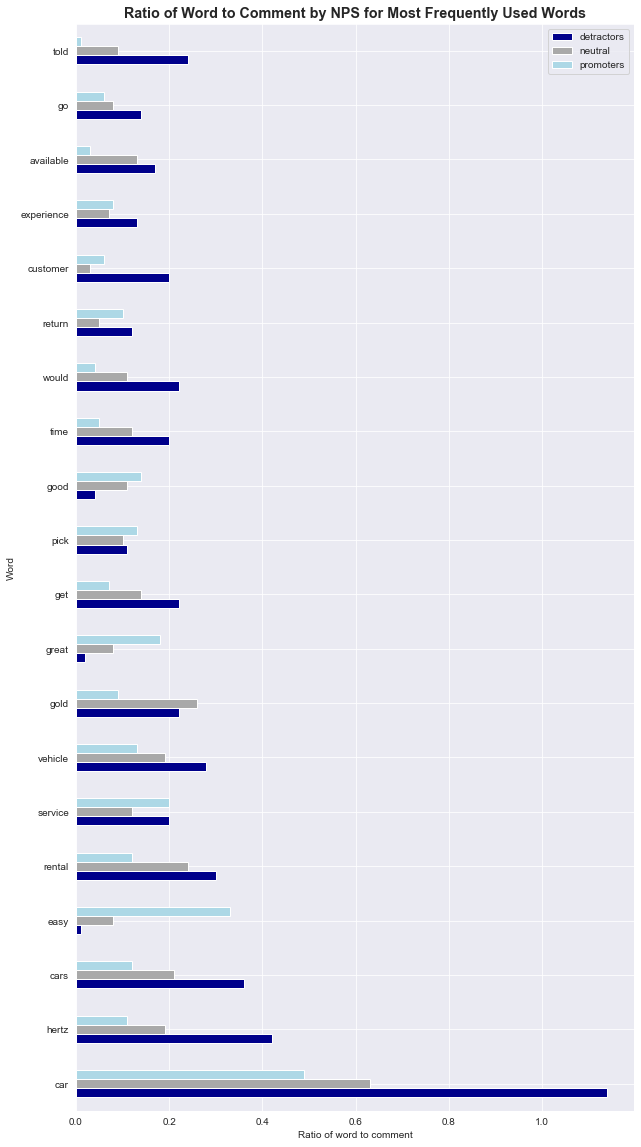

In [209]:
overall_rec_com = pd.concat([det_rec_freq, neu_rec_freq], axis=1)
overall_rec_com = pd.concat([overall_rec_com, pro_rec_freq], axis=1)
overall_rec_com.columns = (
    ['det_freq', 'det_ratio', 'neu_freq', 'neu_ratio', 'pro_freq', 'pro_ratio']
)

overall_rec_com['total_freq'] = (
    overall_rec_com['det_freq'] +
    overall_rec_com['neu_freq'] +
    overall_rec_com['pro_freq']
)

overall_rec_com.sort_values('total_freq', ascending=False, inplace=True)

overall_rec_com[['det_ratio','neu_ratio','pro_ratio']][:20].plot(
    kind='barh', 
    figsize=(10, 20), 
    color=['darkblue','darkgray', 'lightblue']
)
plt.legend(labels = ['detractors', 'neutral', 'promoters'])
plt.title(
    'Ratio of Word to Comment by NPS for Most Frequently Used Words', 
    fontsize='x-large',
    fontweight='bold'
)
plt.xlabel('Ratio of word to comment')
plt.ylabel('Word');

I considered the ratio of selected word to total corpus by NPS group to normalize for comparison since the groups are not the same size. 

## Vehicle Information

In [72]:
clean_rental['Overall Satisfaction with Vehicle'].value_counts()

10.0    653
9.0     237
8.0     195
7.0     103
5.0      64
6.0      58
0.0      40
3.0      37
4.0      29
2.0      20
1.0      19
Name: Overall Satisfaction with Vehicle, dtype: int64

In [73]:
clean_rental['Overall Satisfaction with Vehicle'].isna().sum()

34

In [74]:
clean_rental.groupby('NPS Score')['Overall Satisfaction with Vehicle'].mean()

NPS Score
-100.0    5.196552
 0.0      7.558140
 100.0    9.306505
Name: Overall Satisfaction with Vehicle, dtype: float64

In [75]:
clean_rental['Mechanical condition of Vehicle'].value_counts()

10.0    863
9.0     228
8.0     134
7.0      68
6.0      48
0.0      32
5.0      31
4.0      13
3.0      11
2.0       9
1.0       9
Name: Mechanical condition of Vehicle, dtype: int64

In [76]:
clean_rental['Mechanical condition of Vehicle'].isna().sum()

43

In [77]:
clean_rental.groupby('NPS Score')['Mechanical condition of Vehicle'].mean()

NPS Score
-100.0    6.929329
 0.0      8.415020
 100.0    9.554945
Name: Mechanical condition of Vehicle, dtype: float64

In [78]:
clean_rental['Cleanliness of the Vehicle'].value_counts()

10.0    799
9.0     223
8.0     152
7.0      86
0.0      40
5.0      36
4.0      34
6.0      29
2.0      19
3.0      17
1.0       9
Name: Cleanliness of the Vehicle, dtype: int64

In [79]:
clean_rental['Cleanliness of the Vehicle'].isna().sum()

45

In [80]:
clean_rental.groupby('NPS Score')['Cleanliness of the Vehicle'].mean()

NPS Score
-100.0    6.381625
 0.0      8.190476
 100.0    9.387239
Name: Cleanliness of the Vehicle, dtype: float64

In [81]:
clean_rental['Make & Model'].value_counts()

10.0    691
9.0     238
8.0     174
7.0     102
5.0      76
6.0      47
3.0      34
0.0      27
2.0      20
1.0      17
4.0      16
Name: Make & Model, dtype: int64

In [82]:
clean_rental['Make & Model'].isna().sum()

47

In [83]:
clean_rental.groupby('NPS Score')['Make & Model'].mean()

NPS Score
-100.0    6.109541
 0.0      7.583333
 100.0    9.264609
Name: Make & Model, dtype: float64

The distribution of satisfaction with and condition of  the vehicle matches what was seem with overall recommendation score. Based upon the average satisfaction score by NPS category, it appears that issues with the vehicle may be a driver of low customer scores. I am going to create a new column that is the average of all the ratings dealing with the overall condition of the vehicle.

In [84]:
clean_rental['Overall Vehicle Condition'] = (
    clean_rental['Overall Satisfaction with Vehicle']+
    clean_rental['Mechanical condition of Vehicle']+
    clean_rental['Cleanliness of the Vehicle']+
    clean_rental['Make & Model']+
    clean_rental['Vehicle Selection (Choice)']+
    clean_rental['Vehicle Features']+
    clean_rental['Value for the Money'])/7

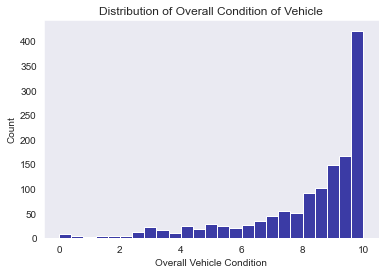

In [85]:
sns.histplot(clean_rental['Overall Vehicle Condition'], color='darkblue')
plt.grid(False)
plt.title('Distribution of Overall Condition of Vehicle');

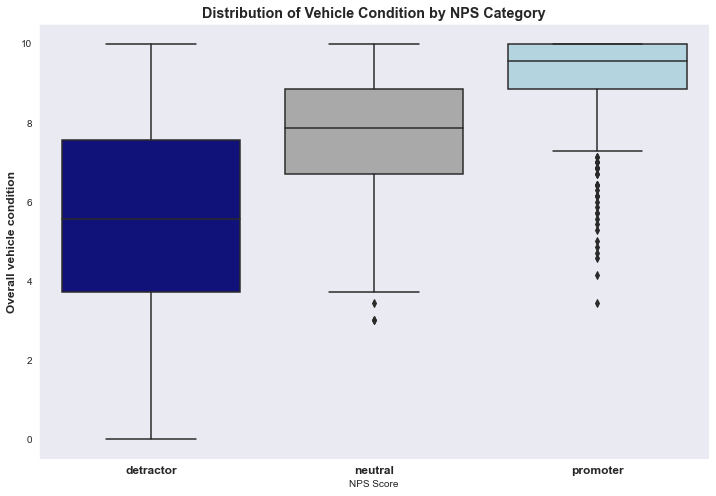

In [86]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(
    data=clean_rental, 
    x='NPS Score', 
    y='Overall Vehicle Condition',
    palette = ['darkblue','darkgray','lightblue']
)
plt.title(
    'Distribution of Vehicle Condition by NPS Category', 
    fontsize='x-large', 
    fontweight='bold'
)
plt.grid(False)
ax.set_xticklabels(
    ['detractor','neutral','promoter'], 
    fontsize='large',
    fontweight = 'bold'
)
plt.ylabel(
    'Overall vehicle condition', 
    fontsize='large',
    fontweight='bold'
);

In [176]:
pd.DataFrame(
    clean_rental.groupby(
        'Original Customer Tier Code'
    )['Overall Vehicle Condition'].mean()
).sort_values(
    'Overall Vehicle Condition',
    ascending=False
)

,Overall Vehicle Condition
Original Customer Tier Code,
Platinum,8.928571
Presidents Circle,8.399638
#1 Club Member,8.391534
5 Star Gold,8.308620
Non-Member,8.302795
Regular Gold,8.142656


## Quality of Service

I am going to create an aggregate column for overall quality of service. First, I will need to change the two columns with "Yes" and "No" to the numerical values of 10 and 0.

In [87]:
clean_rental['Vehicle Ready Upon Arrival'] = np.where(
    clean_rental['Vehicle Ready Upon Arrival'] == 'Yes', 10, 0
)

In [88]:
clean_rental['Greeted with Smile'] = np.where(
    clean_rental['Greeted with Smile'] == 'Yes', 10, 0
)

In [89]:
clean_rental['Overall Service Quality'] = (
    clean_rental['Ease of Pick Up']+
    clean_rental['Ease of Returning Your Vehicle']+
    clean_rental['Helpfulness of the Staff']+
    clean_rental['Felt like a Valued Customer']+
    clean_rental['Speed of Service']+
    clean_rental['Vehicle Ready Upon Arrival']+
    clean_rental['Greeted with Smile'])/8

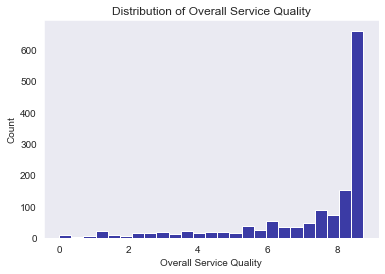

In [90]:
sns.histplot(clean_rental['Overall Service Quality'], color='darkblue')
plt.grid(False)
plt.title('Distribution of Overall Service Quality');

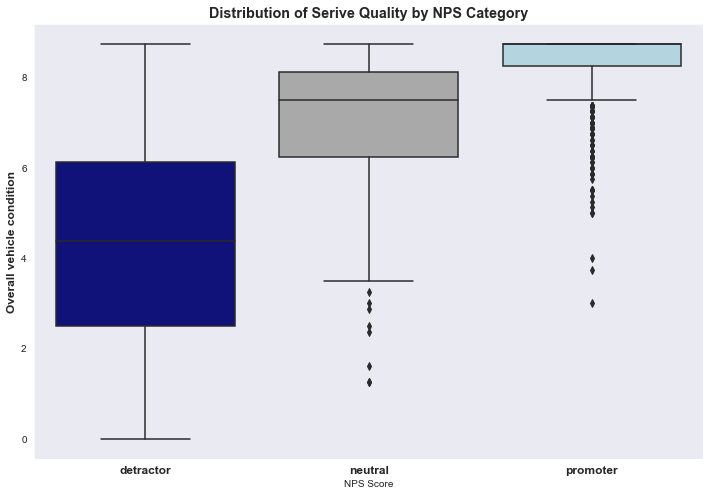

In [91]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(
    data=clean_rental, 
    x='NPS Score', 
    y='Overall Service Quality',
    palette = ['darkblue','darkgray','lightblue']
)
plt.title(
    'Distribution of Serive Quality by NPS Category', 
    fontsize='x-large', 
    fontweight='bold'
)
plt.grid(False)
ax.set_xticklabels(
    ['detractor','neutral','promoter'], 
    fontsize='large',
    fontweight = 'bold'
)
plt.ylabel(
    'Overall vehicle condition', 
    fontsize='large',
    fontweight='bold'
);

In [175]:
pd.DataFrame(
    clean_rental.groupby(
        'Original Customer Tier Code'
    )['Overall Service Quality'].mean()
).sort_values(
    'Overall Service Quality',
    ascending=False
)

,Overall Service Quality
Original Customer Tier Code,
Platinum,8.450000
#1 Club Member,7.446429
Regular Gold,7.370180
Non-Member,7.309615
5 Star Gold,7.304150
Presidents Circle,7.257622


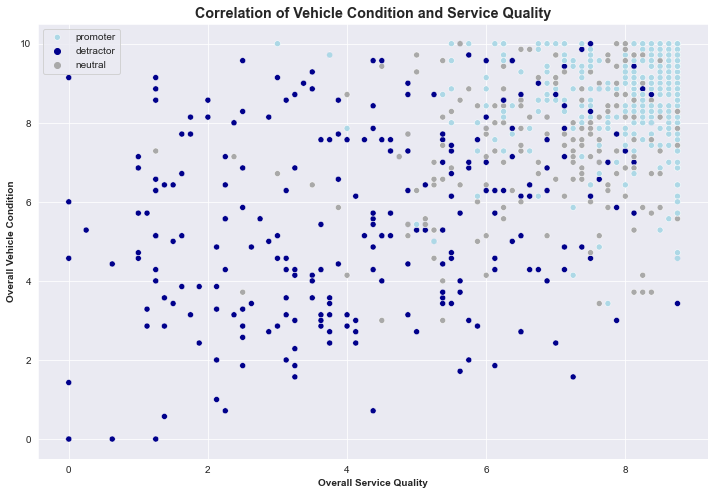

In [197]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.scatterplot(
    x='Overall Service Quality', 
    y='Overall Vehicle Condition', 
    hue='NPS Score', 
    data=clean_rental,
    palette=['darkblue', 'darkgray', 'lightblue']
)
plt.title(
    'Correlation of Vehicle Condition and Service Quality',
    fontsize='x-large',
    fontweight = 'bold'
)
plt.legend(labels=['promoter', 'detractor', 'neutral'])
plt.xlabel('Overall Service Quality', fontweight='bold')
plt.ylabel('Overall Vehicle Condition', fontweight='bold');

## Billing

In [92]:
clean_rental['Bill Correct'].value_counts()

Yes    1225
No      182
Name: Bill Correct, dtype: int64

In [93]:
clean_rental.groupby('Bill Correct')['Bill Correct Comment'].count()

Bill Correct
No     159
Yes      0
Name: Bill Correct Comment, dtype: int64

Since all of these comments are associated with an incorrect bill, it does not make sense to parse them by NPS, as with the general comments.

In [94]:
clean_rental['Bill Correct Comment Tokenized'] = (
    clean_rental
             [clean_rental['Bill Correct Comment'].notna()
             ]['Bill Correct Comment']
             .apply(clean_text)
             )

In [95]:
bill_comm_ind = (
    clean_rental[clean_rental['Bill Correct Comment Tokenized'].notna()]
    ['Bill Correct Comment Tokenized'].index
)

bill_comm_corpus = []

for i in bill_comm_ind:
    bill_comm_corpus.extend(clean_rental.loc[i,'Bill Correct Comment Tokenized'])

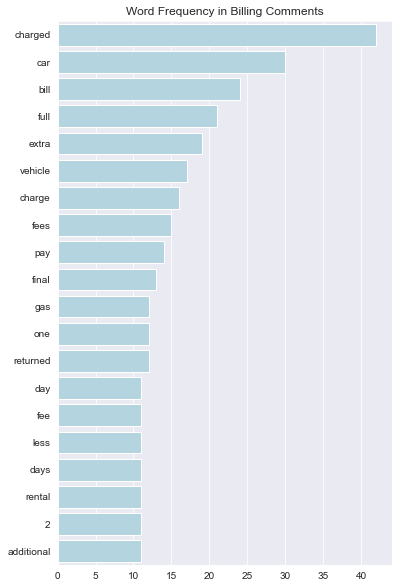

In [96]:
bill_comm_freq_dict = nltk.FreqDist(bill_comm_corpus)
bill_comm_freq_df = pd.DataFrame.from_dict(bill_comm_freq_dict, orient='index')
bill_comm_freq_df = bill_comm_freq_df.sort_values(
    0, 
    ascending=False
).rename(columns = ({0:'freq'}))
fig,ax = plt.subplots(figsize=(6, 10))
sns.barplot(
    x=bill_comm_freq_df['freq'][:20].values, 
    y=bill_comm_freq_df[:20].index,
    color='lightblue'
)
plt.title('Word Frequency in Billing Comments');

## Rental Purpose

In [97]:
clean_rental['Primary Rental Purpose'].value_counts()

Leisure                         748
Business                        457
Both Business and Leisure       188
Other                            17
Insurance Replacement/Loaner      1
Name: Primary Rental Purpose, dtype: int64

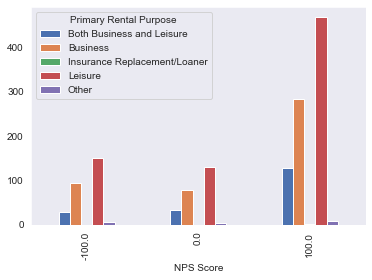

In [98]:
pd.crosstab(clean_rental['NPS Score'], clean_rental['Primary Rental Purpose']).plot(kind='bar')
plt.grid(False)

Across the NPS categories, the primary rental purpose was leisure, followed by business and a mix of the two. There does not seem to be an association between rental purpose and NPS.

## Other Comments

In [99]:
clean_rental[clean_rental['Recognize Staff Comment'].notna()]["Recognize Staff Comment"]

6                                                      No
23                             Can’t remember their name.
40                                                   None
45                                                     no
47                                                     No
                              ...                        
1460    The person I made initial contact Gema was the...
1471                                                 Jose
1473    Do not remember her name but the counter perso...
1486    The agent that handled my rental on the phone ...
1492                       Joss at Hilton Phoenix airport
Name: Recognize Staff Comment, Length: 265, dtype: object

In [100]:
clean_rental['Recognize Staff Comment Tokenized'] = (
    clean_rental
             [clean_rental['Recognize Staff Comment'].notna()
             ]['Recognize Staff Comment']
             .apply(clean_text)
             )

In [101]:
staff_comm_ind = (
    clean_rental[clean_rental['Recognize Staff Comment Tokenized'].notna()]
    ['Recognize Staff Comment Tokenized'].index
)

staff_comm_corpus = []

for i in staff_comm_ind:
    staff_comm_corpus.extend(clean_rental.loc[i,'Recognize Staff Comment Tokenized'])

In [102]:
staff_comm_freq_dict = nltk.FreqDist(staff_comm_corpus)
staff_comm_freq_df = pd.DataFrame.from_dict(staff_comm_freq_dict, orient='index')
staff_comm_freq_df.sort_values(0, ascending=False)[:20]

,0
name,46
helpful,32
car,27
hertz,22
friendly,21
staff,19
great,18
rental,16
airport,16
helped,15


In [123]:
clean_rental[clean_rental['Additional Comments'].notna()]['Additional Comments']

6                                                     No.
10      I like the Gold select a car a go feature the ...
13      Het vak met type 3 was leeg, daarop moest ik h...
23      Honestly feel the cost of renting a car is too...
26                       Thank you for your awesomeness 😊
                              ...                        
1445    カーナビを以前まで借りていたが、使い勝手が悪く、 今回は自分のグーグルマップで代用しました。...
1456    No ................. refund my day and fees im...
1462    Not having water at the exit gate is not a gre...
1476    My experience was fast & efficient. The return...
1479    better selection of vehicles in Presidents circle
Name: Additional Comments, Length: 217, dtype: object

## Agent

In [132]:
nps_by_agent = (
    clean_rental.groupby('VSA Agent Last Name')
    .agg(
        {
            'NPS Score': 'mean', 
            'Survey ID':'count'
        }
    ).sort_values('NPS Score')
)

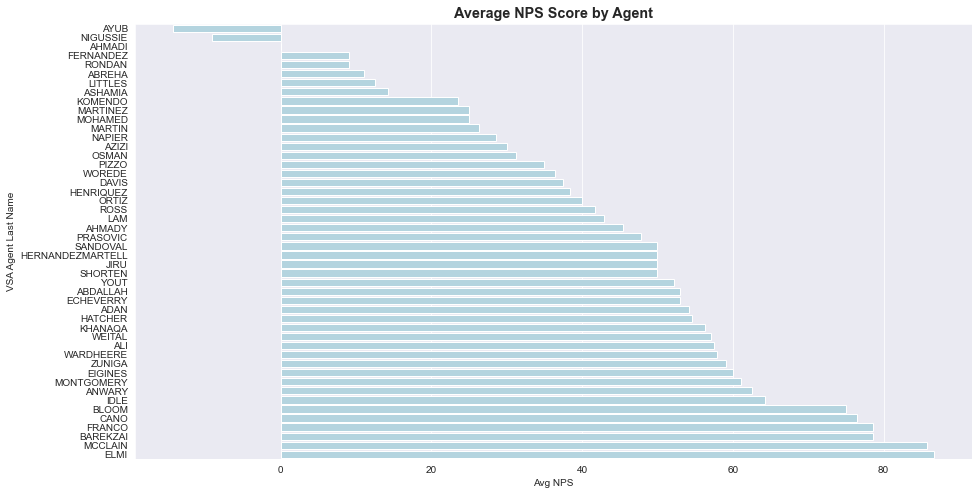

In [208]:
fig, ax = plt.subplots(figsize = (15,8))
sns.barplot(
    x = nps_by_agent[nps_by_agent['Survey ID'] > 6]['NPS Score'].values,
    y = nps_by_agent[nps_by_agent['Survey ID'] > 6]['NPS Score'].index,
    color = 'lightblue'
)
plt.title('Average NPS Score by Agent', fontsize='x-large', fontweight='bold')
plt.xlabel('Avg NPS');

## Investigate Recommendation Scores of Zero

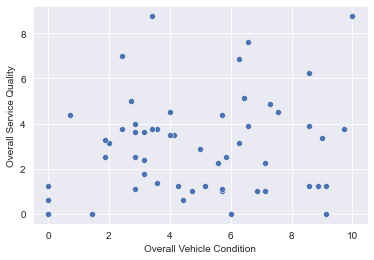

In [198]:
zero = clean_rental[clean_rental['Recommend'] == 0]
sns.scatterplot(
    x='Overall Vehicle Condition', 
    y='Overall Service Quality', 
    data=zero
);

In [200]:
for i in zero['Recommend Comment'].index:
    print(zero['Recommend Comment'][i])

After dinner in Surprise Arizona, I went out to my Hertz rental car in the restaurant parking lot and it would not start. I called Hertz roadside assistance to arrange for a new car. I was put on hold. Hertz roadside assistance came back on and informed me that because no one at the Phoenix Airport Hertz location would answer the phone, she could not arrange for replacement car and I would need to ride in the tow truck back to the Phoenix Hertz and arrange for a replacement myself. I reluctantly agreed because I was not given any other choice. The Roadside assistance person started talking about a double tow without explaining what that means. While waiting for the tow truck to arrive. I attempted several times to call the Phoenix airport Hertz office, but was unable. I call another business at the airport that had a direct number to Hertz and called that. I was told that Hertz would not be able to deliver a replacement car to me because a tow truck was already dispatched. I found this